# 차트 유형별 데이터 분석 - matplotlib

**값의 타입**
- 연속값 : 시간, 온도, 점수와 같이 이어지는 데이터
- 이산값(범주값) : 종류 등과 범주화된 데이터 (영화 장르, 상품 카테고리)

1. histogram 연속형값의 빈도수/개수 파악
2. bar plot 범주형 값의 개수, 또는 다른 연속값을 파악
3. scatter plot 산포도(산점도) 두 연속값들의 분포 파악
4. line plot 시계열데이터(연속값) 변화 파악
5. box plot 연속형 값의 사분위, 이상치 파악
6. pie chart 전체 범위 중의 비율

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
import matplotlib.font_manager as fm
import matplotlib

font_Path = 'C:\\Windows\\Fonts\\gulim.ttc'
font= fm.FontProperties(fname =font_Path).get_name()
matplotlib.rc('font', family = font)


## Histogram
연속형값을 일정구간을 나눠서 구간별 데이터포인트의 빈도를 시각화

x축 : 연속형 데이터
y축 : 구간별 데이터 포인트의 개수(합)

[5. 0. 1. 1. 3. 2.]
[65. 70. 75. 80. 85. 90. 95.]
65.0 ~ 70.0 : 5.0
70.0 ~ 75.0 : 0.0
75.0 ~ 80.0 : 1.0
80.0 ~ 85.0 : 1.0
85.0 ~ 90.0 : 3.0
90.0 ~ 95.0 : 2.0


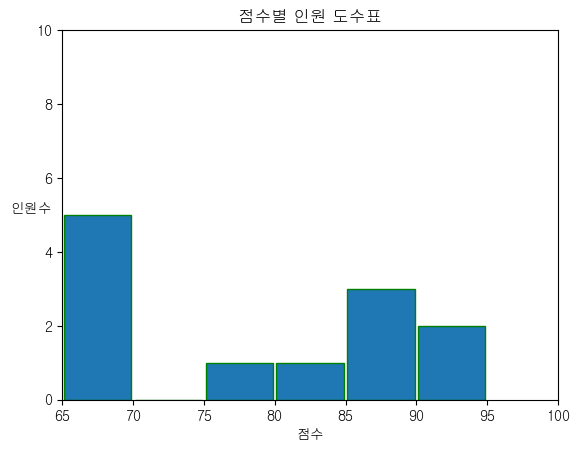

In [44]:
scores = [88, 90, 68, 47, 97, 66, 79, 48, 67, 91, 65, 87, 82, 65, 86]

# bins : 나뉠 구간의 개수 (기본값 : 10)
# 커스텀 구간으로 설정
bins = [65, 70, 75, 80, 85, 90, 95]
count, bins, _ = plt.hist(scores, bins=bins, edgecolor='green', rwidth=0.95)
print(count)
print(bins)

for i in range(len(count)) :
    print(f'{bins[i]} ~ {bins[i+1]} : {count[i]}')


plt.title('점수별 인원 도수표', rotation=0)
plt.xlim(65,100)
plt.ylim(0,10)
plt.xlabel('점수')
plt.ylabel('인원수', rotation=0, fontsize=10, fontweight='bold')


plt.show()

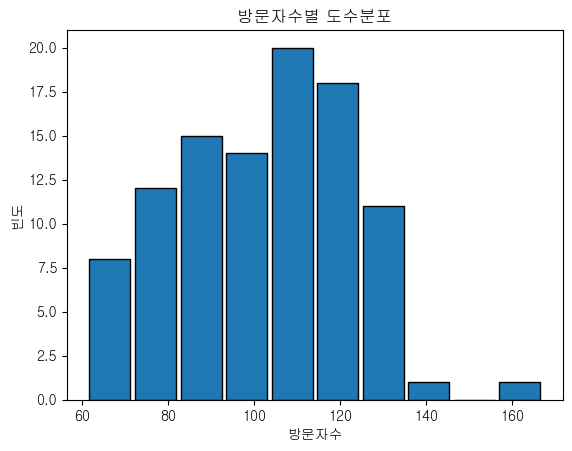

In [79]:
# 누적 히스토그램
# 웹사이트 방문자수
visitors = np.random.normal(100, 20, 100) # 평균, 표준편차, 데이터포인트 수
visitors

plt.hist(visitors, edgecolor='black', rwidth = 0.9 )#cumulative=True)

plt.xlabel('방문자수')
plt.ylabel('빈도')
plt.title('방문자수별 도수분포')

plt.show()

In [82]:
# 암호화폐 일일수익률
# 일일수익률 데이터 = ((오늘 가격- 어제 가격)/ 어제 가격) * 100

df = pd.read_csv('data/crypto_daily_returns.csv')
df

df['BTC'].describe()

count    2385.000000
mean        0.280359
std         3.887338
min       -37.169539
25%        -1.209796
50%         0.203326
75%         1.804233
max        25.247169
Name: BTC, dtype: float64

평균 수익률 :  0.28035901623060794
수익률 표준편차 : 6.471971812162877


C:\Users\tngkr\AppData\Local\Temp\ipykernel_12320\1816584381.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


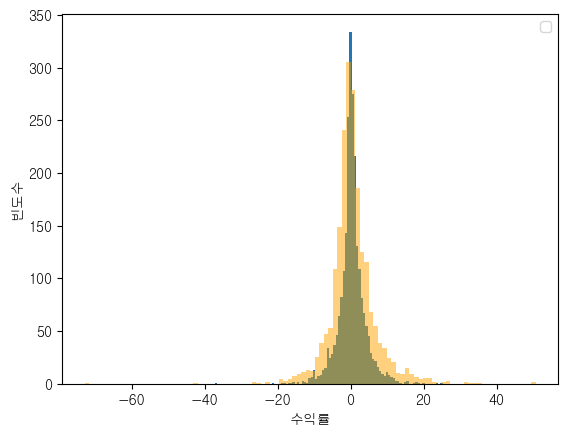

In [91]:
# 정규분포 데이터

# 평균-분산((값-평균)^2의 평균)-표준편차(분산의 제곱근)
# 68-95-99.7규칙 : 1시그마, 2시그마, 3시그마
print('평균 수익률 : ', df['BTC'].mean())
print('수익률 표준편차 :', df['ETH'].std())

# 여러개의 plot을 그릴 때는 그리는 순서, 또는 투명도를 고려하여 작성
plt.hist(df['BTC'], bins=100)
plt.hist(df['ETH'], bins=100, alpha=.5, color='orange')

plt.legend()
plt.xlabel('수익률')
plt.ylabel('빈도수') # Frequency

plt.show()

## Bar Plot
막대차트
범주형 데이터와 연속형 데이터(막대의 길이)의 관계를 시각화

- x축 범주형 데이터 카테고리
- y축 연속형 데이터(총합, 평균)


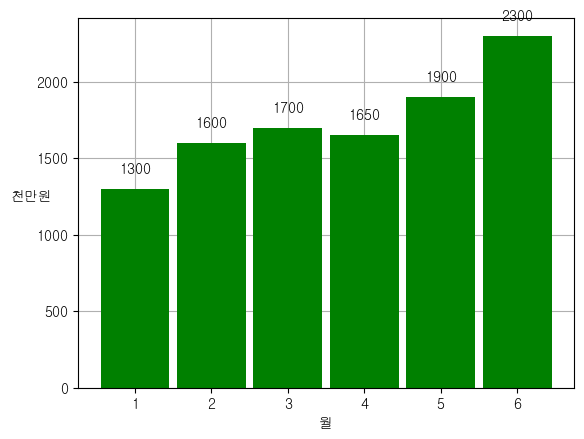

In [109]:
# 월별 매출 데이터
df = pd.DataFrame({
     'months' : ['1', '2', '3', '4', '5', '6'],
     'sales' : [1300, 1600, 1700, 1650, 1900, 2300]
})

plt.grid()
plt.bar(df['months'], df['sales'], color='green',  width=0.9, zorder=2) # zorder값은 클수록 앞으로 나온다.



# 막대별 매출가격 라벨링
for i, val in enumerate(df['sales']):
#           x축,   y축,    텍스트,   텍스트 위치
    plt.text(i, val+100, str(val), ha='center')



plt.xlabel('월')
plt.ylabel('천만원', rotation=0)


plt.show()

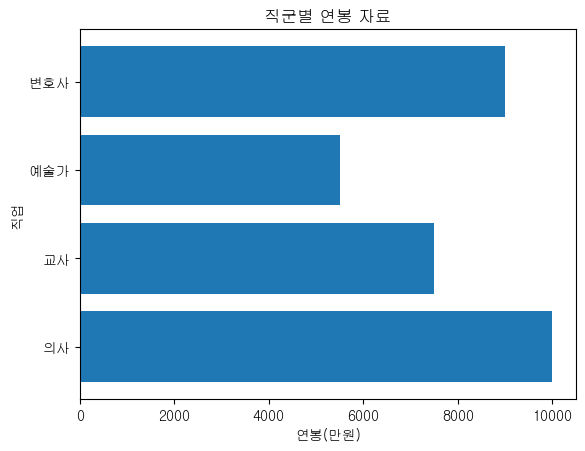

In [116]:
# 수평 막대 그래프
df = pd.DataFrame({
    'job' : ['의사', '교사', '예술가', '변호사'],
    'annual_salary' : [10000, 7500, 5500, 9000]
})

# x축 : job 범주형
# y축 : annual_salary 연속형

#barh = bar horizontal
plt.barh(df['job'], df['annual_salary'])

plt.ylabel('직업')
plt.xlabel('연봉(만원)', rotation=0)
plt.title('직군별 연봉 자료')
plt.show()

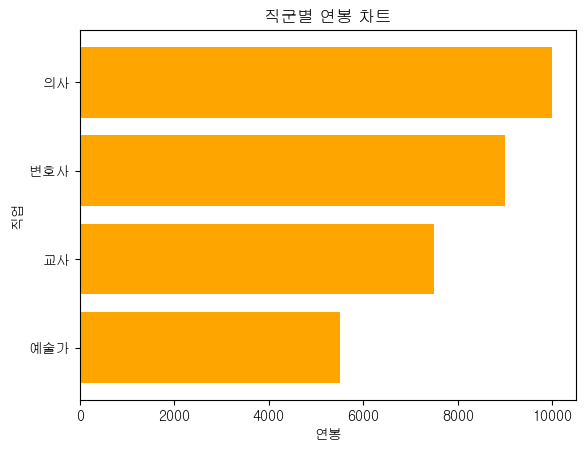

In [121]:
# 정렬된 막대 그래프
# 범주의 순서가 중요하지 않다면, y축 결과 순서를 따르는 것이 좋다.

df = df.sort_values(by='annual_salary', ascending=True)

plt.barh(df['job'], df['annual_salary'], color='orange')

plt.ylabel('직업')
plt.xlabel('연봉')
plt.title('직군별 연봉 차트')

plt.show()

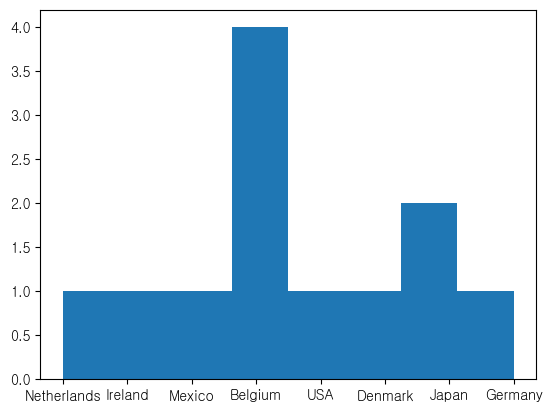

In [164]:
# beers.csv로부터 나라별 맥주의 개수를 시각화하세요
# - 히스토그램
# - 막대


df = pd.read_csv('data/beers.csv')
df

plt.hist(df['country'], bins=df['country'].nunique()) # nunique : 고유한 값 개수

plt.show()





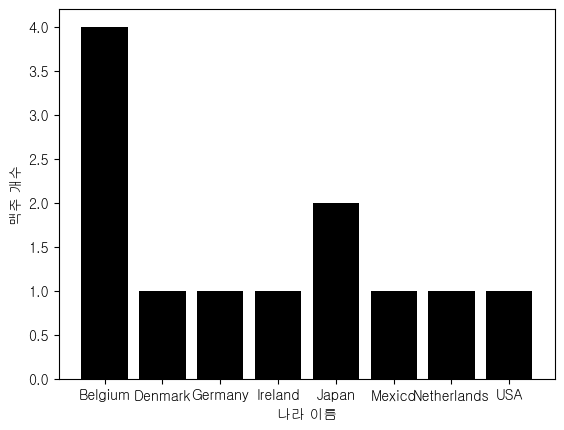

In [157]:
df = pd.read_csv('data/beers.csv')

beers_df_groupby = df.groupby('country')['beer_name'].count()
beers_df_groupby

plt.bar(beers_df_groupby.index, beers_df_groupby.values, color='black')
plt.xlabel('나라 이름')
plt.ylabel('맥주 개수')

plt.show()

## Line Plot
시계열 데이터에서 변화하는 값의 추이를 시각화

- x축 연속형 데이터
- y축 연속형 데이터

In [165]:
df = pd.DataFrame({
     'months' : ['1', '2', '3', '4', '5', '6'],
     'sales' : [1300, 1600, 1700, 1650, 1900, 2300]
})

df

,months,sales
0,1,1300
1,2,1600
2,3,1700
3,4,1650
4,5,1900
5,6,2300


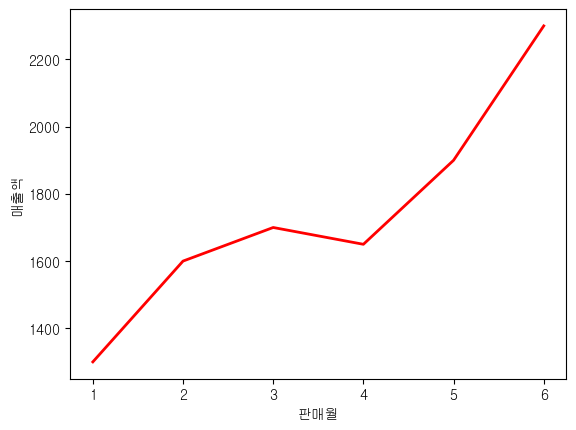

In [170]:
plt.plot(df['months'], df['sales'], color='red', linewidth = 2) # 더 극적으로 보임

plt.xlabel('판매월')
plt.ylabel('매출액')
plt.show()

#plt.bar(df['months'], df['sales'])
#plt.xlabel('판매월')
#plt.ylabel('매출액')
#plt.show()

In [190]:
# 주가 추이
df= pd.DataFrame({
    'Date' : pd.date_range(start='2024-12-03', periods=25, freq='D'),
    'APPL' : np.random.randint(100,150,25),
    'MSFT' : np.random.randint(100,150,25)
})
df

,Date,APPL,MSFT
0,2024-12-03,118,111
1,2024-12-04,110,120
2,2024-12-05,108,130
3,2024-12-06,125,103
4,2024-12-07,110,133
5,2024-12-08,142,105
6,2024-12-09,104,102
7,2024-12-10,135,148
8,2024-12-11,129,148
9,2024-12-12,103,110


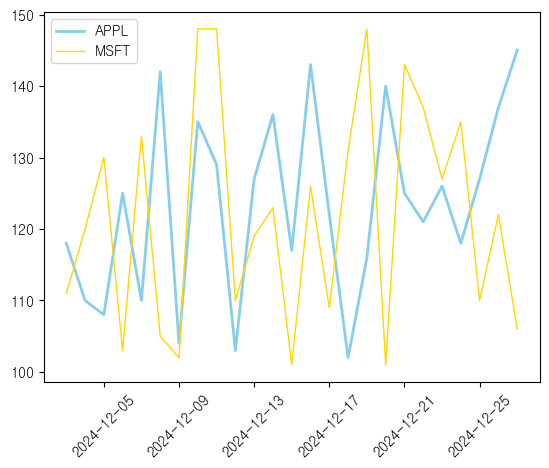

In [191]:
plt.plot(df['Date'], df['APPL'], label = 'APPL', color='skyblue', linewidth = 2)
df
plt.plot(df['Date'], df['MSFT'], label = 'MSFT', color='gold', linewidth = 1)

plt.xticks(rotation = 45) # xticks가 눈금임
plt.legend()
plt.show()

<Figure size 1500x800 with 0 Axes>

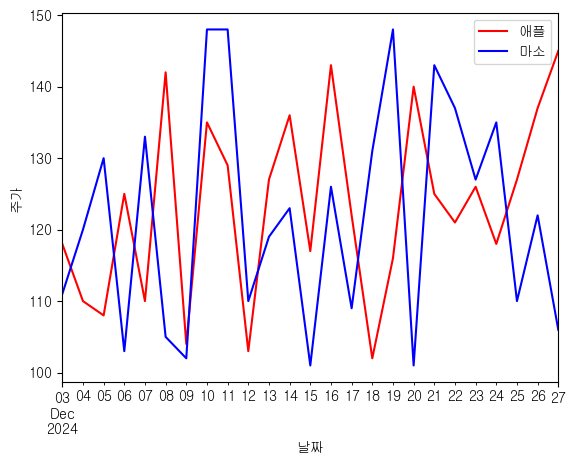

In [199]:
# Series/DataFrame의 plot을 그리기 보통, plt.plot이었다.
# - legend가 자동 작성됨
plt.figure(figsize = (15,8))



df.plot(x='Date',
        y=['APPL', 'MSFT'],
        color = ['red', 'blue'],
        label = ['애플', '마소']
)
plt.xlabel('날짜')
plt.ylabel('주가')
plt.show()


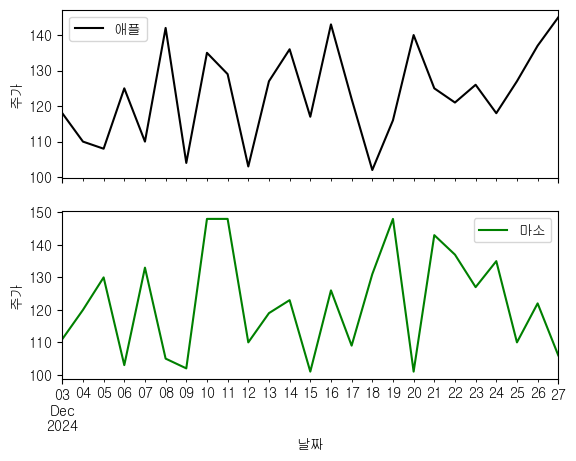

In [205]:
ax = df.plot(x='Date',
             y = ['APPL','MSFT'],
             color = ['black', 'green'],
             label=['애플', '마소'],
             subplots=True # 각각의 그래프로 생성이 되게 된다. 활성화 시
             )

ax[0].set_xlabel('날짜')
ax[0].set_ylabel('주가')

ax[1].set_xlabel('날짜')
ax[1].set_ylabel('주가')

plt.show()

In [232]:
# 코인 주가 추이 crypto_daily_prices.csv

df = pd.read_csv('data/crypto_daily_prices.csv')
df

df.describe()

,BTC-USD Price,ETH-USD Price,LTC-USD Price
count,2385.000000,2061.000000,2385.000000
mean,6471.857333,281.507678,50.907238
std,9289.022505,359.038596,57.699041
min,178.102997,0.434829,1.157010
25%,454.618988,13.035700,3.826380
50%,4076.632568,187.325317,43.022701
75%,8864.766602,346.532654,68.170303
max,61243.085940,1977.276855,358.335999


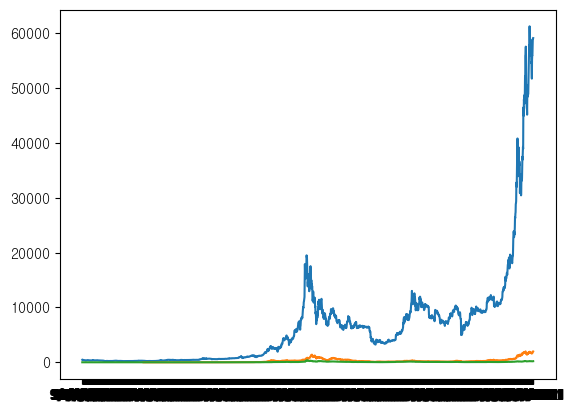

In [233]:
plt.plot(df['Date'], df['BTC-USD Price'])
plt.plot(df['Date'],  df['ETH-USD Price'])
plt.plot(df['Date'],  df['LTC-USD Price'])

plt.show()

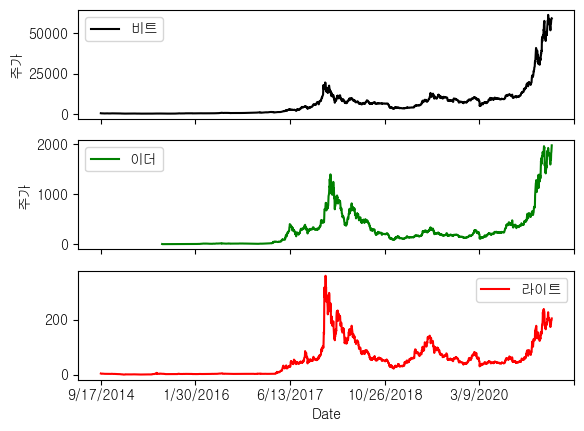

In [235]:
ax = df.plot(x='Date',
             y = ['BTC-USD Price','ETH-USD Price', 'LTC-USD Price'],
             color = ['black', 'green', 'red'],
             label=['비트', '이더', '라이트'],
             subplots=True # 각각의 그래프로 생성이 되게 된다. 활성화 시
             )

ax[0].set_xlabel('날짜')
ax[0].set_ylabel('주가')

ax[1].set_xlabel('날짜')
ax[1].set_ylabel('주가')

plt.show()

## Scatter Plot
두 축 변수의 관계를 시각화

두 변수간의 상관관계, 클러스터링, 이상치 파악에 도움이 된다.

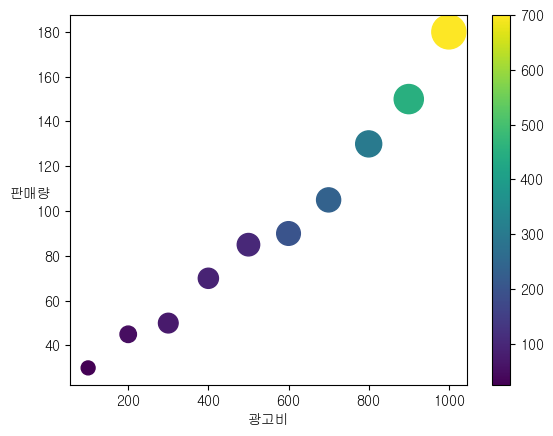

In [242]:
# 광고비, 판매량 데이터
df = pd.DataFrame({
    'ad_budget' : np.arange(100, 1001, 100),
    'sales' : [30, 45, 50, 70, 85, 90, 105, 130, 150, 180],
    'visitor' : [100, 140, 200, 210, 260, 290, 300, 350, 440, 600],
    'colors' : [25, 50, 70, 90, 100, 200, 235, 300, 450, 700]

})
df

# x축, y축
# size : 점의 크기로 데이터 표현
# color : 컬러값에 연속 데이터 표현

plt.scatter(df['ad_budget'], df['sales'], s=df['visitor'], c= df['colors'])

plt.colorbar()

plt.xlabel('광고비')
plt.ylabel('판매량', rotation=0)
plt.show()

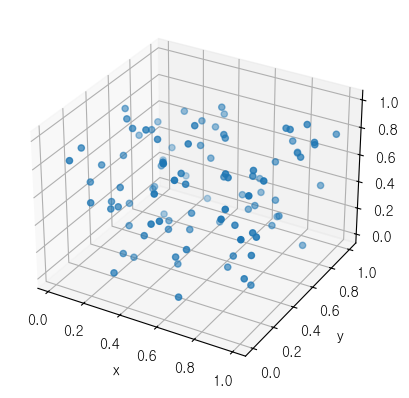

[0.6955014  0.24325336 0.14010246 0.77554249 0.55967036 0.93696502
 0.41714396 0.0975845  0.70861536 0.80320115 0.36612574 0.98577837
 0.78248759 0.94858511 0.88365618 0.79465519 0.53325301 0.9954297
 0.85656016 0.94487479 0.10035454 0.83000683 0.55861511 0.12172789
 0.65250297 0.36191497 0.8288595  0.47214644 0.48595442 0.56434998
 0.03656089 0.94018332 0.21197353 0.5128493  0.60161323 0.98827302
 0.5542966  0.91794571 0.93371021 0.84656187 0.98516963 0.24427507
 0.94834234 0.19882859 0.4114394  0.6173466  0.16939799 0.55240688
 0.165854   0.46782092 0.19855772 0.02019452 0.74869382 0.20247184
 0.0762223  0.4039606  0.21710039 0.06837291 0.15376054 0.50737891
 0.69506327 0.01337286 0.76492415 0.75320757 0.9022173  0.5677495
 0.76570052 0.3287538  0.80136687 0.32764677 0.3630728  0.1440903
 0.18060868 0.84276068 0.04689578 0.5725617  0.96691494 0.62285772
 0.32472271 0.27148295 0.78533025 0.91341319 0.46571453 0.62391498
 0.12439152 0.13242086 0.16760744 0.79816246 0.55984756 0.4380751

In [256]:
# 3D 산점도
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

# figure객체 - 3차원 ax를 형성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection= '3d' ) # 1, 1, 1은 그 범위가 줄어들어 삼차원 한 지점으로 가는 것

ax.scatter(x, y, z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

print(x)



## Pie Chart
전체에서 각 부분이 기여하는 비율(중요 부분)을 시각화

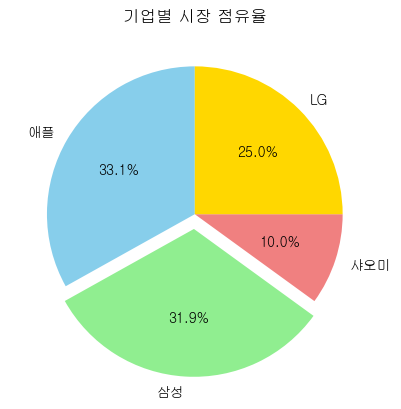

In [276]:
# 기업별 시장 점유율
df = pd.DataFrame({
    'label' : ['애플', '삼성', '샤오미', 'LG'],
    'market_share' : [33.1, 31.9, 10 ,25],
    'explode' : [0, 0.1, 0, 0]
})
df

plt.pie(df['market_share'],
        labels=df['label'],
        autopct='%.1f%%',
        startangle = 90,
        colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold'],
        explode = df['explode'])

# 어떤 기업만 돌출시키고 싶을 때, explode 부분을 사용, 똑 떼어져서 나옴


plt.title('기업별 시장 점유율')
plt.show()


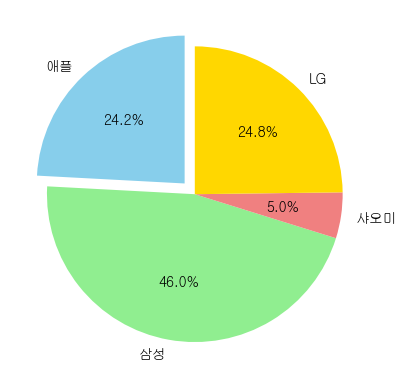

In [279]:
df = pd.DataFrame({
    'label' : ['애플', '삼성', '샤오미', 'LG'],
    'market_share' : [33.1, 31.9, 10 ,25],
    'sales' : [1234, 2352, 256, 1267],
    'explode' : [0.1, 0, 0, 0]
})
df

plt.pie(
    df['sales'],  # 알아서 전체 중의 퍼센트로 된다
    labels=df['label'],
    autopct='%.1f%%',
    startangle = 90,
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold'],
    explode = df['explode'])

plt.show()

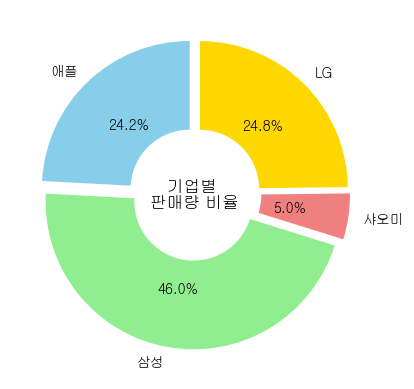

In [280]:
# 도넛 차트
plt.pie(df['sales'],
        labels=df['label'],
        autopct='%.1f%%',
        startangle = 90,
        explode=[.05, .05, .05, .05],
        colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold'],
        wedgeprops={'width' : .6})


# 센터 부분에 텍스트 가능
plt.text(0,0,'기업별 \n판매량 비율', ha='center', va='center', fontsize=12)

plt.show()

## Box Plot
연속형 데이터의 분포를 사분위수로 시각화.
이상치(outlier)를 도출하는데 효과적

- x축 : 이산값(범주값) 데이터
- y축 : 연속형 데이터

표횐되는 값들
- max 최대값
- Q3 3분위수(75%)
- Q2 2분위수(50%) : median
- Q1 1분위수(25%)
- min 최소값

Q1~ Q3 : IQR : Inter-quatile Range 사분범위

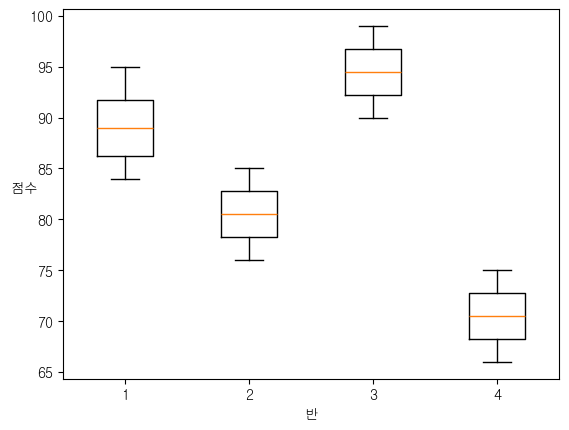

In [291]:
# 반별 시험성적 데이터 (2차원 배열) - 대괄호가 두개
class_scores = [
    [85, 88, 90, 92, 93, 87, 95, 91, 84, 86],  # Class A
    [78, 82, 85, 80, 79, 84, 81, 83, 77, 76],  # Class B
    [92, 95, 96, 94, 90, 97, 93, 91, 98, 99],  # Class C
    [70, 72, 68, 75, 74, 69, 73, 71, 66, 67]   # Class D
]

plt.boxplot(class_scores)

plt.xlabel('반')
plt.ylabel('점수', rotation=0)

plt.show()


In [292]:
# Class A의 값
data1 = class_scores[0]
print('최소값 : ', np.min(data1))
print('사분위수(Q1) : ', np.percentile(data1, 25))
print('사분위수(Q2) : ', np.percentile(data1, 50))
print('사분위수(Q3) : ', np.percentile(data1, 75))
print('최대값 : ', np.max(data1))


최소값 :  84
사분위수(Q1) :  86.25
사분위수(Q2) :  89.0
사분위수(Q3) :  91.75
최대값 :  95


Index(['A', 'B', 'C', 'D'], dtype='object')


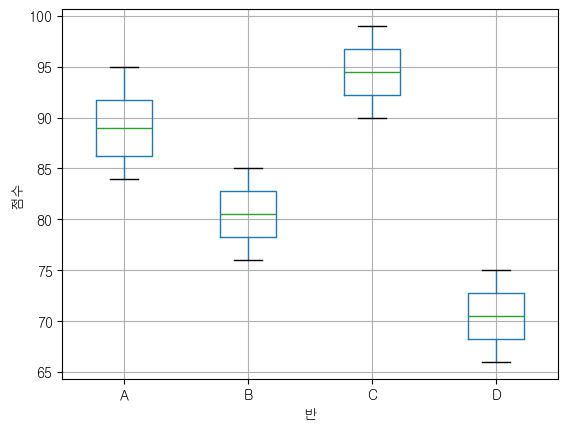

In [303]:
# 반별 시험성적 데이터 (DataFrame), 중괄호로 바꾸면, dict형태가 되어 다음과 같이 변형한다.
class_scores = {
    'A' : [85, 88, 90, 92, 93, 87, 95, 91, 84, 86],  # Class A
    'B' : [78, 82, 85, 80, 79, 84, 81, 83, 77, 76],  # Class B
    'C' : [92, 95, 96, 94, 90, 97, 93, 91, 98, 99],  # Class C
    'D' : [70, 72, 68, 75, 74, 69, 73, 71, 66, 67]   # Class D
}

df = pd.DataFrame(class_scores)
df

print(df.columns)

# 1차원 : 반
# 2차원 : 점수

# plt.boxplot(df)
# x축 tick 지정
# plt.xticks([1, 2, 3, 4], ['A', 'B', 'C', 'D']) # xtick이 직접 지정해야 함

# df 메소드에 boxplot이 있는데, xtick이 컬럼명으로 자동 지정이 됨.
df.boxplot()

plt.xlabel('반')
plt.ylabel('점수')

plt.show()



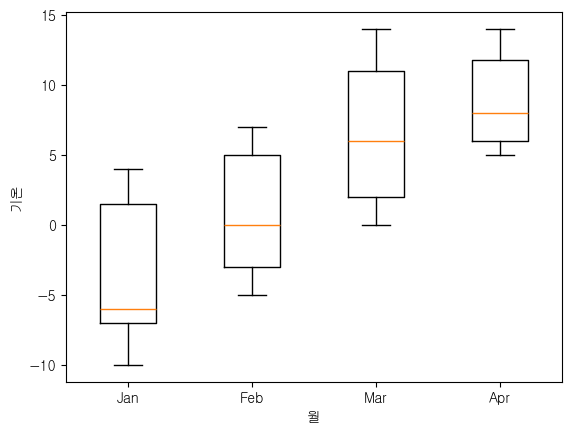

In [309]:
# 월별 기온 데이터(예시, 각 월의 기온 분포

temperatures = [
    [ -1,  -8,  -9, -10,  -9,   2,  -4,   2,  -7,  -6,  -7,  -4,  -6,
      4,  -8,  -7,  -4,   2,  -7,   4,   3,  -7,   2,  -2,  -9,  -7,
      3,   1,  -7,  -9,  -5],  # January
    [-2,  1,  6, -1,  3,  0,  2,  5,  5, -4,  5,  3, -3, -5, -5, -1, -3,
     6, -4,  6, -3, -3, -2, -1,  5,  7,  2,  0],  # February
    [13,  1, 10,  3, 12,  1,  0,  1,  4, 10, 10,  0, 14, 12, 10,  2, 12,
     1, 13,  3,  1,  4,  7,  5,  6,  9,  2, 13,  5, 12, 10],  # March
    [ 7,  6, 12,  5, 12, 10, 14, 12,  6,  6,  7,  9,  6,  9, 10, 13,  7,
      6, 11,  8,  5,  8, 14, 10,  6,  8, 12,  6,  6, 12],   # April
]

#df1 = pd.DataFrame(temperatures)
#df1

plt.boxplot(temperatures)
plt.xticks([1, 2, 3, 4], ['Jan', 'Feb', 'Mar', 'Apr'])
plt.xlabel('월')
plt.ylabel('기온')
plt.show()



In [ ]:
# 이상치 검출

Text(0, 0.5, '가격(싯가)')

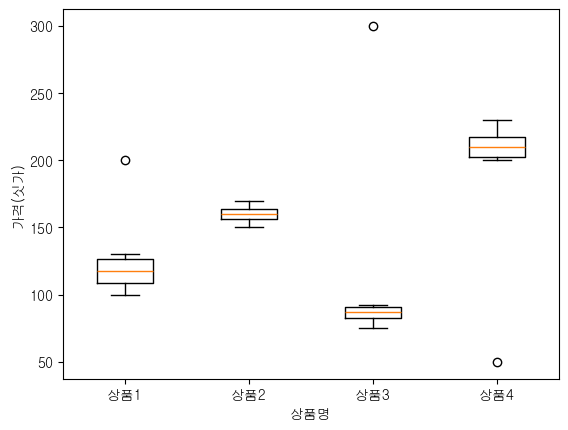

In [311]:
weird_data = [
    [100, 120, 130, 110, 115, 105, 125, 200],   # 이상치 200 포함
    [150, 160, 170, 155, 165, 158, 162],
    [80, 85, 90, 75, 92, 87, 300],              # 이상치 300 포함
    [200, 220, 210, 205, 215, 230, 50],         # 이상치 50 포함
]

plt.boxplot(weird_data)
plt.xticks([1, 2, 3, 4], ['상품1', '상품2', '상품3', '상품4'])
plt.xlabel('상품명')
plt.ylabel('가격(싯가)')

In [318]:
# 이상치 판별
# 데이터 상한/하한 경계를 벗어난 데이터 포인트를 이상치로 간주
# - 상한 : Q3 + 1.5 * IQR
# - 하한 : Q1 - 1.5 * IQR

data = np.array(weird_data[0])
data

q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
print(q1, q3, iqr)
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
print(f'{lower_bound} ~ {upper_bound}')

outliers = data[(data< lower_bound) | (data > upper_bound)] #|가 or이다.
print(outliers)

108.75 126.25 17.5
82.5 ~ 152.5
[200]


## yahoo finance

전세계 주식/코인 시장에서 주가 데이터를 제공하는 패키지

주가 데이터를 가져오는 방법
- ticker.history()
- yf.download()
- pandas_datareader.data.get_data_yahoo

In [ ]:
!conda install yfinance - y

In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

yfinance.Ticker object <CHRS>
yfinance.Ticker object <ENVX>


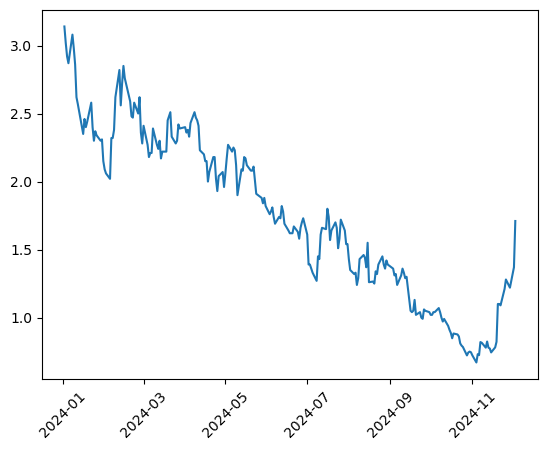

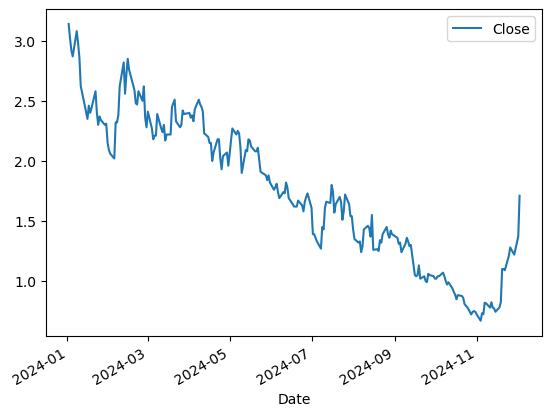

In [31]:
# 코히러스 CHRS
ticker1 = yf.Ticker('CHRS')
print(ticker1)

# 에노빅스 ENVX
ticker2 = yf.Ticker('ENVX')
print(ticker2)

df1 = ticker1.history(period='ytd')
df2 = ticker2.history(period='ytd')

df1.columns
# 'Open' : 시작가
# 'High' : 고가
# 'Low' : 저가
# 'Close' : 종가
# 'Volume' : 거래량
# 'Dividends' : 배당금
# 'Stock Splits' : 주식 분할 여부

plt.plot(df1.index, df1['Close'], label='CHRS')
plt.xticks(rotation=45)
plt.show()

# x: df.index로 자동 지정
df1.plot(y = 'Close')
plt.show()




In [34]:
# 여러 주식을 동시에 비교하기
tickers = ['AAPL', 'NVDA', 'TSLA']
df = yf.download(tickers, period='1mo')
df

df.columns # 두 요소 이상 넣어야 특정됨

[*********************100%***********************]  3 of 3 completed


MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'NVDA'),
            ('Adj Close', 'TSLA'),
            (    'Close', 'AAPL'),
            (    'Close', 'NVDA'),
            (    'Close', 'TSLA'),
            (     'High', 'AAPL'),
            (     'High', 'NVDA'),
            (     'High', 'TSLA'),
            (      'Low', 'AAPL'),
            (      'Low', 'NVDA'),
            (      'Low', 'TSLA'),
            (     'Open', 'AAPL'),
            (     'Open', 'NVDA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'NVDA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])

(array([20032., 20036., 20040., 20044., 20048., 20052., 20056., 20058.]),
 [Text(20032.0, 0, '2024-11-05'),
  Text(20036.0, 0, '2024-11-09'),
  Text(20040.0, 0, '2024-11-13'),
  Text(20044.0, 0, '2024-11-17'),
  Text(20048.0, 0, '2024-11-21'),
  Text(20052.0, 0, '2024-11-25'),
  Text(20056.0, 0, '2024-11-29'),
  Text(20058.0, 0, '2024-12-01')])

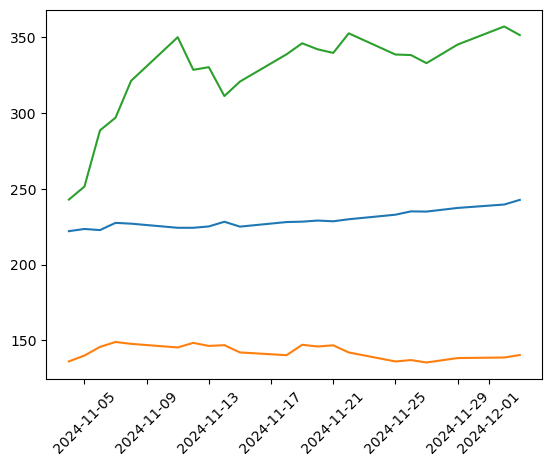

In [39]:
plt.plot(df.index, df['Close']) # apple것만 하고 싶으면, [('Close', 'AAPL')]
plt.xticks(rotation=45)


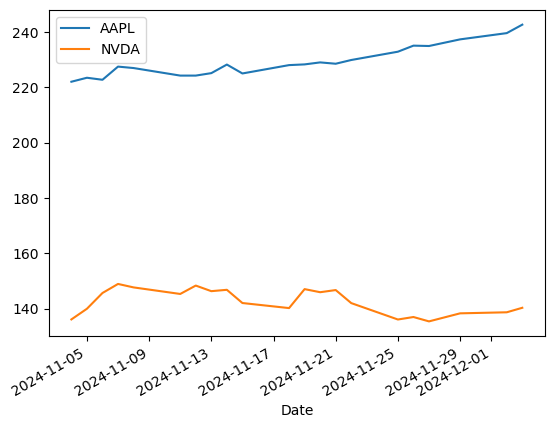

In [40]:
df.plot(y = [('Close', 'AAPL'), ('Close', 'NVDA')], label= ['AAPL', 'NVDA'])
plt.show()

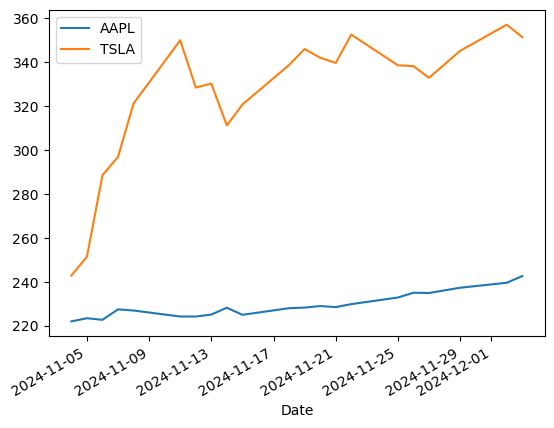

In [41]:
df.plot(y = [('Close', 'AAPL'), ('Close', 'TSLA')], label= ['AAPL', 'TSLA'])
plt.show()

In [60]:
import matplotlib.font_manager as fm
import matplotlib

font_Path = 'C:\\Windows\\Fonts\\gulim.ttc'
font= fm.FontProperties(fname =font_Path).get_name()
matplotlib.rc('font', family = font)

# 삼성(kospi) 주가 조회
ticker = yf.Ticker('005930.KS') # KS : 시장 식별자
df = ticker.history(period='ytd')

<Axes: xlabel='Date'>

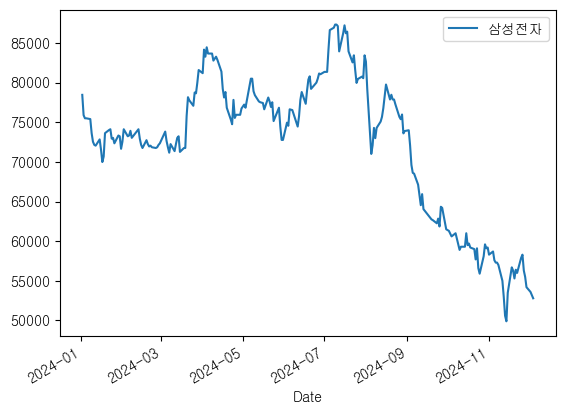

In [61]:
df.plot(y= 'Close', label = '삼성전자')

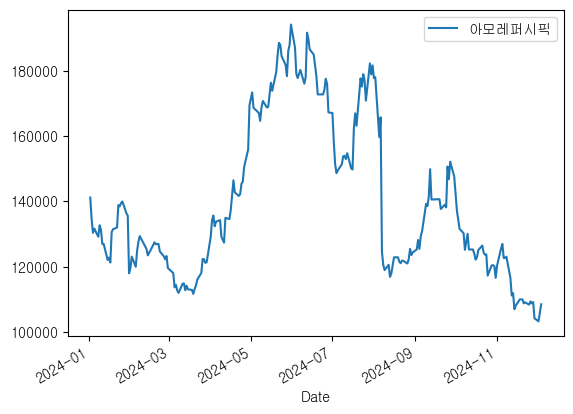

In [62]:
ticker = yf.Ticker('090430.KS') # KS : 시장 식별자
df2 = ticker.history(period='ytd')

df2.plot(y = 'Close', label = '아모레퍼시픽')
plt.legend()
plt.show()

In [66]:
ticker = yf.Ticker('005930.KS')
ticker.info

{'address1': '129 Samsung-Ro',
 'address2': 'Maetan-3dong Yeongtong-gu',
 'city': 'Suwon',
 'zip': '443-742',
 'country': 'South Korea',
 'phone': '82 2 2255 0114',
 'fax': '82 3 1200 7538',
 'website': 'https://www.samsung.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Samsung Electronics Co., Ltd. engages in the consumer electronics, information technology and mobile communications, and device solutions businesses worldwide. The company offers smartphones, tablets, watches, and accessories; TVs, projectors, and sound devices; home appliances, including refrigerators, washing machines and dryers, vacuum cleaners, cooking appliances, dishwashers, air conditioners, and air purifiers; monitors and memory storage products; displays, and smart and LED signages; and other accessories. It also engages in ventur

In [67]:
ticker.financials # 기업 재무재표


,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Tax Effect Of Unusual Items,-22864080000.0,-25405600000.0,-13557566210.000643,-24113252297.550728,NaN
Tax Rate For Calcs,0.24,0.275,0.251995,0.273415,NaN
Normalized EBITDA,50698344000000.0,86403532000000.0,88084529000000.0,67351939000000.0,NaN
Total Unusual Items,-95267000000.0,-92384000000.0,-53801000000.0,-88193000000.0,NaN
Total Unusual Items Excluding Goodwill,-95267000000.0,-92384000000.0,-53801000000.0,-88193000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,14473401000000.0,54730018000000.0,39243791000000.0,26090846000000.0,NaN
Reconciled Depreciation,38666559000000.0,39107659000000.0,34247361000000.0,30335616000000.0,NaN
Reconciled Cost Of Revenue,180388580000000.0,190041770000000.0,166411342000000.0,144488296000000.0,NaN
EBITDA,50603077000000.0,86311148000000.0,88030728000000.0,67263746000000.0,NaN
EBIT,11936518000000.0,47203489000000.0,53783367000000.0,36928130000000.0,NaN
